In [73]:
import os
import numpy as np
import pandas as pd

from pandas import ExcelWriter
from pandas import ExcelFile

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator
import matplotlib.dates as mdates

from scipy.interpolate import interp1d
import scipy.interpolate as spi
from scipy.interpolate import splrep, splev

from sklearn.preprocessing import MinMaxScaler

import scipy.fftpack

In [74]:
file_dir = os.path.join('/Users/digisha/Downloads/Fatigue_project/data')
file_name = os.path.join(file_dir, 'Sample_Data.xlsx')
df = pd.read_excel(file_name, sheetname='Sheet1')
df.head()

/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,subject_id,question_id,answer,timestamp
0,6,1600,5,06-22-2018 22:18:46
1,6,1601,3,06-22-2018 22:18:55
2,6,1602,3,06-22-2018 22:19:02
3,6,1603,4,06-22-2018 22:19:26
4,6,1600,6,06-22-2018 23:44:43


In [75]:
#changing datatypes, time stamp in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [76]:
#only depression fatigue questionnare considererd
mask = (df['question_id'] >= 1600) & (df['question_id'] < 1700)
df_16 = df.loc[mask].reset_index(drop=True)
df_16['time'] = [t.time() for t in df_16['timestamp']]
#df_16['time'] = df_16['time'].apply(lambda x: x.strftime('%H:%M:%S'))
df_16['answer']=df_16.answer.astype('int64')
df_16.head()

,subject_id,question_id,answer,timestamp,time
0,6,1600,5,2018-06-22 22:18:46,22:18:46
1,6,1601,3,2018-06-22 22:18:55,22:18:55
2,6,1602,3,2018-06-22 22:19:02,22:19:02
3,6,1603,4,2018-06-22 22:19:26,22:19:26
4,6,1600,6,2018-06-22 23:44:43,23:44:43


In [77]:
#df_16['time'] = df_16['time'].apply(lambda x: x.strftime('%H:%M:%S'))
df_16['hour'] = [t.time() for t in df_16['timestamp']]

In [78]:
datetime_object = datetime.strptime('00:00:00', '%H:%M:%S')
df_16['hour'] = 0.00
for i in range(len(df_16)):
    df_16['hour'][i] = (df_16['timestamp'][i] - datetime_object).seconds/(60*60)
    df_16['hour'][i] = df_16['hour'][i].round(2)
    
df_16.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,subject_id,question_id,answer,timestamp,time,hour
0,6,1600,5,2018-06-22 22:18:46,22:18:46,22.31
1,6,1601,3,2018-06-22 22:18:55,22:18:55,22.32
2,6,1602,3,2018-06-22 22:19:02,22:19:02,22.32
3,6,1603,4,2018-06-22 22:19:26,22:19:26,22.32
4,6,1600,6,2018-06-22 23:44:43,23:44:43,23.75


In [79]:
mask = (df_16['question_id'] == 1600)
df_1600 = df_16.loc[mask].reset_index(drop=True)
#df_1601.tail()


df_1600['time'] = 0
k = 0
df_1600['time'] = df_1600['time'].astype('float')
patient = [6,27]
for pat in patient:
    #print('pat',pat)
    count = 0
    #print('count',count)
    for i in range(0,len(df_1600)):
        if pat == df_1600['subject_id'][i]:
            #print('sub=pat', pat, i, count)
            if count == 0:
                df_1600['time'][i] = 0
                #print('i',i)
                k = i
            else:
                #print('a')
                df_1600['time'][i] = (((df_1600['timestamp'][i] - df_1600['timestamp'][k]).days)*24) + df_1600['hour'][i]
            count += 1
df_1600['time'] = df_1600['time'].round(2)
df_1600.tail(7)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,subject_id,question_id,answer,timestamp,time,hour
144,27,1600,4,2018-11-19 20:36:13,356.60,20.60
145,27,1600,2,2018-11-20 05:56:42,341.94,5.94
146,27,1600,4,2018-11-20 09:59:13,345.99,9.99
147,27,1600,4,2018-11-20 14:10:55,350.18,14.18
148,27,1600,5,2018-11-20 18:48:51,354.81,18.81
149,27,1600,5,2018-11-20 19:57:36,355.96,19.96
150,27,1600,5,2018-11-21 05:25:07,365.42,5.42


In [80]:
mask = (df_16['question_id'] == 1601)
df_1601 = df_16.loc[mask].reset_index(drop=True)
#df_1601.tail()


df_1601['time'] = 0
k = 0
df_1601['time'] = df_1601['time'].astype('float')
patient = [6,27]
for pat in patient:
    #print('pat',pat)
    count = 0
    #print('count',count)
    for i in range(0,len(df_1601)):
        if pat == df_1601['subject_id'][i]:
            #print('sub=pat', pat, i, count)
            if count == 0:
                df_1601['time'][i] = 0
                #print('i',i)
                k = i
            else:
                #print('a')
                df_1601['time'][i] = (((df_1601['timestamp'][i] - df_1601['timestamp'][k]).days)*24) + df_1601['hour'][i]
            count += 1
df_1601['time'] = df_1601['time'].round(2)
df_1601.tail(7)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,subject_id,question_id,answer,timestamp,time,hour
144,27,1601,2,2018-11-19 20:36:16,356.60,20.60
145,27,1601,4,2018-11-20 05:56:44,341.95,5.95
146,27,1601,2,2018-11-20 09:59:16,345.99,9.99
147,27,1601,3,2018-11-20 14:10:58,350.18,14.18
148,27,1601,3,2018-11-20 18:48:55,354.82,18.82
149,27,1601,4,2018-11-20 19:57:40,355.96,19.96
150,27,1601,3,2018-11-21 05:25:10,365.42,5.42


In [81]:
mask = (df_16['question_id'] == 1602)
df_1602 = df_16.loc[mask].reset_index(drop=True)
#df_1601.tail()


df_1602['time'] = 0
k = 0
df_1602['time'] = df_1602['time'].astype('float')
patient = [6,27]
for pat in patient:
    #print('pat',pat)
    count = 0
    #print('count',count)
    for i in range(0,len(df_1602)):
        if pat == df_1602['subject_id'][i]:
            #print('sub=pat', pat, i, count)
            if count == 0:
                df_1602['time'][i] = 0
                #print('i',i)
                k = i
            else:
                #print('a')
                df_1602['time'][i] = (((df_1602['timestamp'][i] - df_1602['timestamp'][k]).days)*24) + df_1602['hour'][i]
            count += 1
df_1602['time'] = df_1602['time'].round(2)
df_1602.tail(7)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,subject_id,question_id,answer,timestamp,time,hour
144,27,1602,2,2018-11-19 20:36:18,356.60,20.60
145,27,1602,4,2018-11-20 05:57:00,341.95,5.95
146,27,1602,1,2018-11-20 09:59:18,345.99,9.99
147,27,1602,3,2018-11-20 14:11:01,350.18,14.18
148,27,1602,3,2018-11-20 18:48:59,354.82,18.82
149,27,1602,2,2018-11-20 19:57:43,355.96,19.96
150,27,1602,1,2018-11-21 05:25:14,365.42,5.42


In [82]:
mask = (df_16['question_id'] == 1603)
df_1603 = df_16.loc[mask].reset_index(drop=True)
#df_1601.tail()


df_1603['time'] = 0
k = 0
df_1603['time'] = df_1603['time'].astype('float')
patient = [6,27]
for pat in patient:
    #print('pat',pat)
    count = 0
    #print('count',count)
    for i in range(0,len(df_1603)):
        if pat == df_1603['subject_id'][i]:
            #print('sub=pat', pat, i, count)
            if count == 0:
                df_1603['time'][i] = 0
                #print('i',i)
                k = i
            else:
                #print('a')
                df_1603['time'][i] = (((df_1603['timestamp'][i] - df_1603['timestamp'][k]).days)*24) + df_1603['hour'][i]
            count += 1
df_1603['time'] = df_1603['time'].round(2)
df_1603.tail(7)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,subject_id,question_id,answer,timestamp,time,hour
144,27,1603,0,2018-11-19 20:36:21,356.61,20.61
145,27,1603,0,2018-11-20 05:57:04,341.95,5.95
146,27,1603,0,2018-11-20 09:59:21,345.99,9.99
147,27,1603,0,2018-11-20 14:11:04,350.18,14.18
148,27,1603,0,2018-11-20 18:49:03,354.82,18.82
149,27,1603,0,2018-11-20 19:57:46,355.96,19.96
150,27,1603,0,2018-11-21 05:25:17,365.42,5.42


Min: 0.000000, Max: 8.000000
Min: 0.000000, Max: 4.954397
Min: 0.000000, Max: 7.000000
Min: 1.000000, Max: 6.513382


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:110: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:148: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


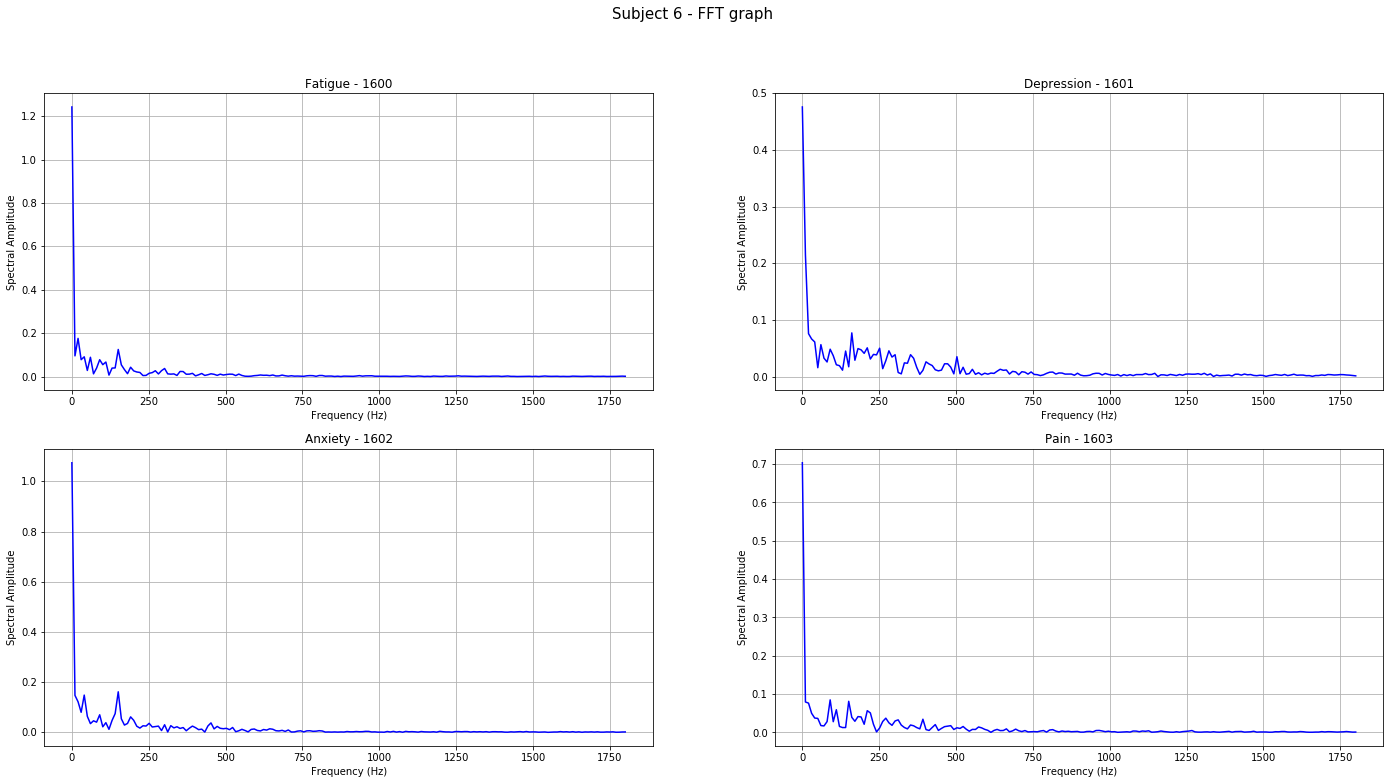

In [90]:
plt.figure(figsize = (24,12))
plt.suptitle('Subject 6 - FFT graph', fontsize=15)

mask = (df_1600['subject_id'] == 6)
df_1600_6 = df_1600.loc[mask].reset_index(drop=True)
df = df_1600_6.filter(['time','answer'], axis=1)
#df.tail()

x = df['time'].values
y = df['answer'].values
xnew = np.linspace(0,359,360)
intfunc = spi.interp1d(x,y,fill_value="extrapolate")
ynew = intfunc(xnew)

X = np.array(list(zip(xnew, ynew)))
y = ynew.reshape((len(ynew), 1))

# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

# normalize the dataset and print the first 5 rows
normalized = scaler.transform(y)

y = [item for sublist in normalized for item in sublist]

# Number of samplepoints
N = 360
# sample spacing
T = 1/3600
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
plt.subplot(2, 2, 1)
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]), color = 'blue')
plt.grid()
plt.title('Fatigue - 1600')
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'Spectral Amplitude')

#----------------------------------
mask = (df_1601['subject_id'] == 6)
df_1601_6 = df_1601.loc[mask].reset_index(drop=True)
df = df_1601_6.filter(['time','answer'], axis=1)
#df.tail()

x = df['time'].values
y = df['answer'].values
xnew = np.linspace(0,359,360)
intfunc = spi.interp1d(x,y,fill_value="extrapolate")
ynew = intfunc(xnew)

X = np.array(list(zip(xnew, ynew)))
y = ynew.reshape((len(ynew), 1))

# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

# normalize the dataset and print the first 5 rows
normalized = scaler.transform(y)

y = [item for sublist in normalized for item in sublist]

# Number of samplepoints
N = 360
# sample spacing
T = 1/3600
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
plt.subplot(2, 2, 2)
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]), color = 'blue')
plt.grid()
plt.title('Depression - 1601')
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'Spectral Amplitude')


#----------------------------------
mask = (df_1602['subject_id'] == 6)
df_1602_6 = df_1602.loc[mask].reset_index(drop=True)
df = df_1602_6.filter(['time','answer'], axis=1)
#df.tail()

x = df['time'].values
y = df['answer'].values
xnew = np.linspace(0,359,360)
intfunc = spi.interp1d(x,y,fill_value="extrapolate")
ynew = intfunc(xnew)

X = np.array(list(zip(xnew, ynew)))
y = ynew.reshape((len(ynew), 1))

# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

# normalize the dataset and print the first 5 rows
normalized = scaler.transform(y)

y = [item for sublist in normalized for item in sublist]

# Number of samplepoints
N = 360
# sample spacing
T = 1/3600
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
plt.subplot(2, 2, 3)
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]), color = 'blue')
plt.grid()
plt.title('Anxiety - 1602')
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'Spectral Amplitude')

#----------------------------------
mask = (df_1603['subject_id'] == 6)
df_1603_6 = df_1603.loc[mask].reset_index(drop=True)
df = df_1603_6.filter(['time','answer'], axis=1)
#df.tail()

x = df['time'].values
y = df['answer'].values
xnew = np.linspace(0,359,360)
intfunc = spi.interp1d(x,y,fill_value="extrapolate")
ynew = intfunc(xnew)

X = np.array(list(zip(xnew, ynew)))
y = ynew.reshape((len(ynew), 1))

# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

# normalize the dataset and print the first 5 rows
normalized = scaler.transform(y)

y = [item for sublist in normalized for item in sublist]

# Number of samplepoints
N = 360
# sample spacing
T = 1/3600
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
plt.subplot(2, 2, 4)
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]), color = 'blue')
plt.grid()
plt.title('Pain - 1603')
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'Spectral Amplitude')

plt.show()

Min: 0.192308, Max: 8.622093
Min: 0.000000, Max: 5.000000
Min: 0.000000, Max: 5.000000
Min: 0.000000, Max: 0.976793


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:110: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:148: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


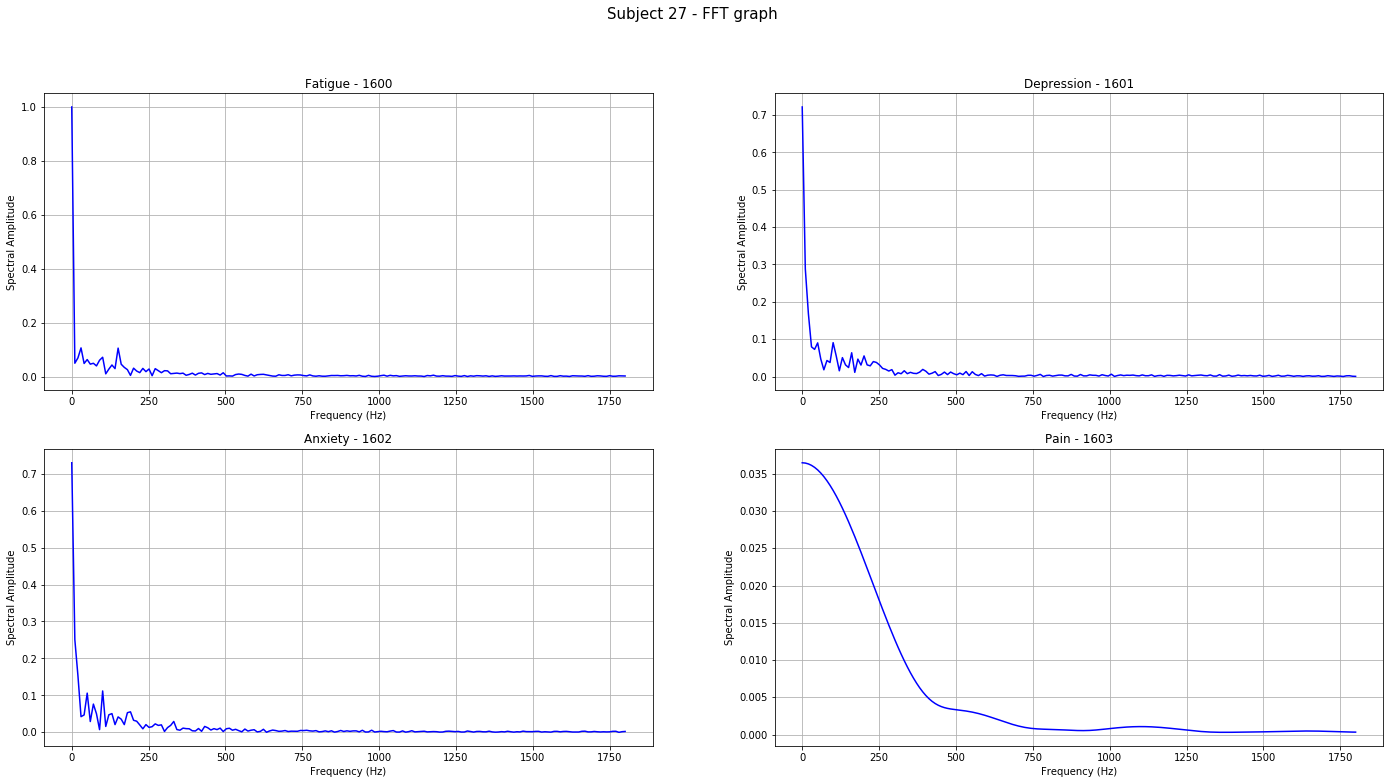

In [91]:
plt.figure(figsize = (24,12))
plt.suptitle('Subject 27 - FFT graph', fontsize=15)

mask = (df_1600['subject_id'] == 27)
df_1600_6 = df_1600.loc[mask].reset_index(drop=True)
df = df_1600_6.filter(['time','answer'], axis=1)
#df.tail()

x = df['time'].values
y = df['answer'].values
xnew = np.linspace(0,359,360)
intfunc = spi.interp1d(x,y,fill_value="extrapolate")
ynew = intfunc(xnew)

X = np.array(list(zip(xnew, ynew)))
y = ynew.reshape((len(ynew), 1))

# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

# normalize the dataset and print the first 5 rows
normalized = scaler.transform(y)

y = [item for sublist in normalized for item in sublist]

# Number of samplepoints
N = 360
# sample spacing
T = 1/3600
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
plt.subplot(2, 2, 1)
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]), color = 'blue')
plt.grid()
plt.title('Fatigue - 1600')
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'Spectral Amplitude')

#----------------------------------
mask = (df_1601['subject_id'] == 27)
df_1601_6 = df_1601.loc[mask].reset_index(drop=True)
df = df_1601_6.filter(['time','answer'], axis=1)
#df.tail()

x = df['time'].values
y = df['answer'].values
xnew = np.linspace(0,359,360)
intfunc = spi.interp1d(x,y,fill_value="extrapolate")
ynew = intfunc(xnew)

X = np.array(list(zip(xnew, ynew)))
y = ynew.reshape((len(ynew), 1))

# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

# normalize the dataset and print the first 5 rows
normalized = scaler.transform(y)

y = [item for sublist in normalized for item in sublist]

# Number of samplepoints
N = 360
# sample spacing
T = 1/3600
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
plt.subplot(2, 2, 2)
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]), color = 'blue')
plt.grid()
plt.title('Depression - 1601')
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'Spectral Amplitude')


#----------------------------------
mask = (df_1602['subject_id'] == 27)
df_1602_6 = df_1602.loc[mask].reset_index(drop=True)
df = df_1602_6.filter(['time','answer'], axis=1)
#df.tail()

x = df['time'].values
y = df['answer'].values
xnew = np.linspace(0,359,360)
intfunc = spi.interp1d(x,y,fill_value="extrapolate")
ynew = intfunc(xnew)

X = np.array(list(zip(xnew, ynew)))
y = ynew.reshape((len(ynew), 1))

# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

# normalize the dataset and print the first 5 rows
normalized = scaler.transform(y)

y = [item for sublist in normalized for item in sublist]

# Number of samplepoints
N = 360
# sample spacing
T = 1/3600
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
plt.subplot(2, 2, 3)
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]), color = 'blue')
plt.grid()
plt.title('Anxiety - 1602')
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'Spectral Amplitude')

#----------------------------------
mask = (df_1603['subject_id'] == 27)
df_1603_6 = df_1603.loc[mask].reset_index(drop=True)
df = df_1603_6.filter(['time','answer'], axis=1)
#df.tail()

x = df['time'].values
y = df['answer'].values
xnew = np.linspace(0,359,360)
intfunc = spi.interp1d(x,y,fill_value="extrapolate")
ynew = intfunc(xnew)

X = np.array(list(zip(xnew, ynew)))
y = ynew.reshape((len(ynew), 1))

# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

# normalize the dataset and print the first 5 rows
normalized = scaler.transform(y)

y = [item for sublist in normalized for item in sublist]

# Number of samplepoints
N = 360
# sample spacing
T = 1/3600
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
plt.subplot(2, 2, 4)
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]), color = 'blue')
plt.grid()
plt.title('Pain - 1603')
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'Spectral Amplitude')

plt.show()